In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import *
import glob
import pandas as pd
from matplotlib.lines import Line2D
markers=list(Line2D.markers)
import seaborn as sns
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stixsans'
#plotting parameters to make presentable plots
#sns.set(font_scale=1.25,style='white', palette='deep')#,rc = {'figure.figsize':(10,5)})#,font_style='bold') # font='SF Hello'

### Load Data

In [2]:
files = glob.glob('../COMSOL Simulation - THG SiMS/240312-HeightSweep_Qnr=150/Data/*.xlsx')
#files = glob.glob('Loss =150/Data/*.xlsx')

In [3]:
files

['../COMSOL Simulation - THG SiMS/240312-HeightSweep_Qnr=150/Data\\240312-x_pol_S1=120nm_Qnr=150_H=400nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240312-HeightSweep_Qnr=150/Data\\240312-x_pol_S1=120nm_Qnr=150_H=450nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240312-HeightSweep_Qnr=150/Data\\240312-x_pol_S1=120nm_Qnr=150_H=500nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240312-HeightSweep_Qnr=150/Data\\240312-x_pol_S1=120nm_Qnr=150_H=550nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240312-HeightSweep_Qnr=150/Data\\240312-x_pol_S1=120nm_Qnr=150_H=600nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240312-HeightSweep_Qnr=150/Data\\240312-x_pol_S1=120nm_Qnr=150_H=615nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240312-HeightSweep_Qnr=150/Data\\240312-x_pol_S1=120nm_Qnr=150_H=630nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240312-HeightSweep_Qnr=150/Data\\240312-x_pol_S1=120nm_Qnr=150_H=650nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240312-HeightSweep_Qnr=150/Data\\240312-x_pol_S1=120nm_Qnr=150_H=660nm

In [4]:
data_list = []

for i in range(len(files)):
    data = pd.read_excel(files[i],index_col=None)#,usecols=range(8))
    # S1 = int(files[i].split('=')[-1][:-7])
    # S1 = int(files[i].split('_')[-2][3:6])
    # data['S1_nm'] = S1
    # data['Qnr'] = 999
    data_list.append(data)
    # 1_list.append(S1)
    # filename=files[i].split('\\')[1]
    # data.to_excel('Data/'+filename,index=False)
    print(len(data.columns))
main_df = pd.concat(data_list)

H_list=list(set(main_df['H']))
H_list.sort()

11
11
11
11
11
11
11
11
11
11
11
11
11


### Plot raw data

Text(0, 0.5, 'Transmission (Arb. Units)')

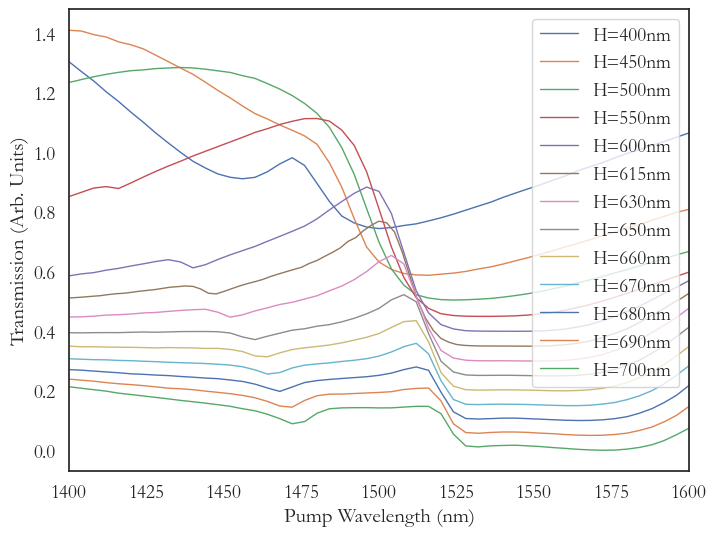

In [6]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.25,style='white', palette='deep',font='Garamond')

spacing = 0.05
for i in range(len(H_list)):
    if H_list[i] == 999:
        continue
    else:
        sub_df = main_df[main_df['H']==H_list[i]]
        stack_sep = spacing*(len(H_list)-1-i)
        plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearTransmission']+stack_sep,label='H=%dnm' %((H_list[i]) ),#label=r'%snm ($\alpha$=%0.2f)' %(S1_list[i],(230-S1_list[i])/230 ),
                 linewidth=1,marker='none',fillstyle='none',markersize=4)
plt.legend(loc=1)
plt.xlim(1400,1600)
plt.xlabel('Pump Wavelength (nm)')
plt.ylabel('Transmission (Arb. Units)')
# plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/Transmisssion.png',dpi=200)

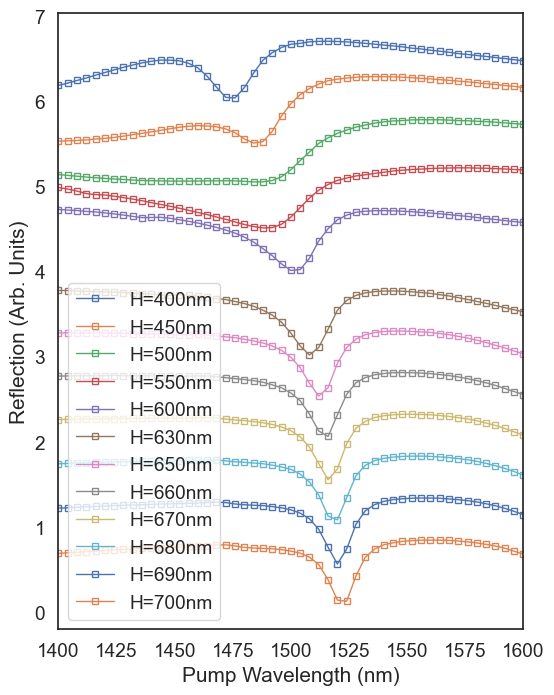

In [17]:
plt.figure(figsize=(6,8))
sns.set(font_scale=1.25,style='white', palette='deep',font='Arial')
spacing = 0.5
array_2d = []
for i in range(len(H_list)):
    if H_list[i] in [0,50,999,615]:
        continue
    else:
        sub_df = main_df[main_df['H']==H_list[i]]
        stack_sep = spacing*(len(H_list)-1-i)
        plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection']+stack_sep,label='H=%dnm' %(H_list[i]),
                 marker='s',fillstyle='none',markersize=4, linewidth=1)
        array_2d.append(np.array(sub_df['LinearReflection']))
plt.legend(loc=3)
plt.xlim(1400,1600)
plt.xlabel('Pump Wavelength (nm)')
plt.ylabel('Reflection (Arb. Units)')
# plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/Reflection.png',dpi=200)
plt.show()

In [16]:
len(array_2d[5])

101

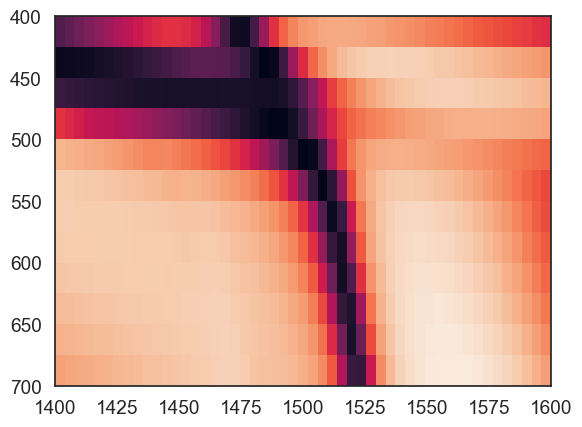

In [18]:
plt.imshow(array_2d,aspect='auto',extent=[1400,1600,700,400])

Text(0, 0.5, 'Relative Field Enhancement (Arb. Units)')

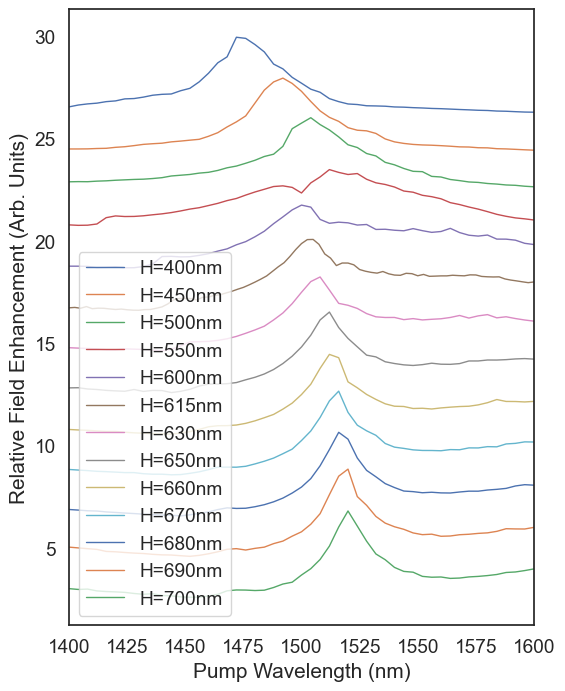

In [19]:
plt.figure(figsize=(6,8))
sns.set(font_scale=1.25,style='white', palette='deep',font='Arial')
spacing = 2
for i in range(len(H_list)):
    if H_list[i] in [0,50,999]:
        continue
    else:
        sub_df = main_df[main_df['H']==H_list[i]]
        stack_sep = spacing*(len(H_list)-1-i)
        plt.plot(sub_df['PumpWavelength_nm'],sub_df['RFE_Pump']+stack_sep,label='H=%dnm' %(H_list[i]),
                 linewidth=1,marker='none',fillstyle='none',markersize=3, )
plt.legend(loc=3)
plt.xlim(1400,1600)
plt.xlabel('Pump Wavelength (nm)')
plt.ylabel('Relative Field Enhancement (Arb. Units)')
# plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/RelEnhancement.png',dpi=200)

Text(0, 0.5, 'Relative Field Enhancement (Arb. Units)')

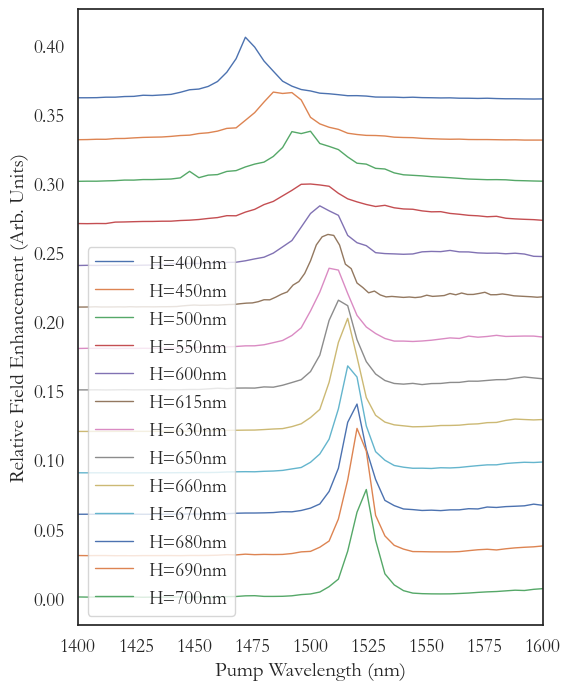

In [20]:
plt.figure(figsize=(6,8))
sns.set(font_scale=1.25,style='white', palette='deep',font='Garamond')
spacing = 0.03
for i in range(len(H_list)):
    if H_list[i] in [0,50,999]:
        continue
    else:
        sub_df = main_df[main_df['H']==H_list[i]]
        stack_sep = spacing*(len(H_list)-1-i)
        plt.plot(sub_df['PumpWavelength_nm'],sub_df['RFE_THG']+stack_sep,label='H=%dnm' %((H_list[i]) ),
                 linewidth=1,marker='none',fillstyle='none',markersize=3, )
plt.legend(loc=3)
plt.xlim(1400,1600)
plt.xlabel('Pump Wavelength (nm)')
plt.ylabel('Relative Field Enhancement (Arb. Units)')
# plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/RelEnhancement.png',dpi=200)

Text(0, 0.5, 'THG Intensity (Forward) (Wcm$^{-2}$)')

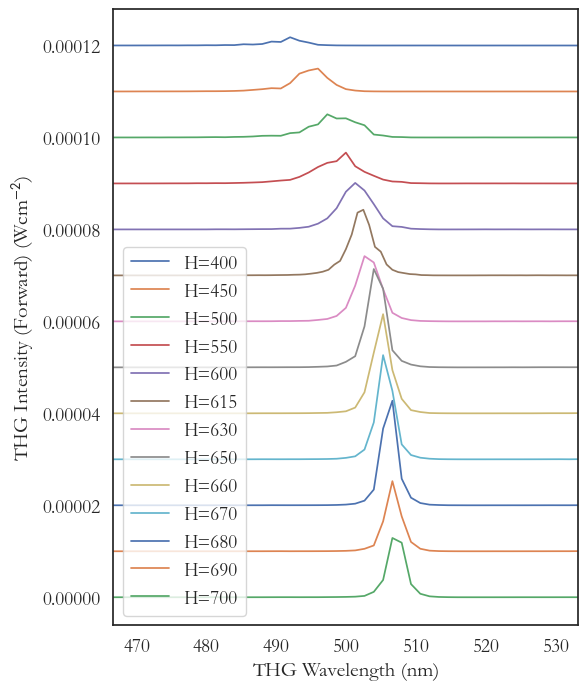

In [21]:
plt.figure(figsize=(6,8))
spacing=1e-5
for i in range(len(H_list)):
    sub_df = main_df[main_df['H']==H_list[i]]
    stack_sep = spacing*(len(H_list)-1-i)
    if H_list[i] in [0,50,999]:
        continue
    else:
        plt.plot(sub_df['THGWavelength_nm'],sub_df['THG_Forward']+stack_sep,label='H=%d' %((H_list[i]) ),
                 linewidth=1.25,marker='none',fillstyle='none',markersize=3, )
plt.legend(loc=3)
plt.xlim(1400/3,1600/3)
plt.xlabel('THG Wavelength (nm)')
plt.ylabel(r'THG Intensity (Forward) (Wcm$^{-2}$)')
#plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/THG_Forward.png',dpi=200)

Text(0, 0.5, 'THG Intensity (Backward) (Wcm$^{-2}$)')

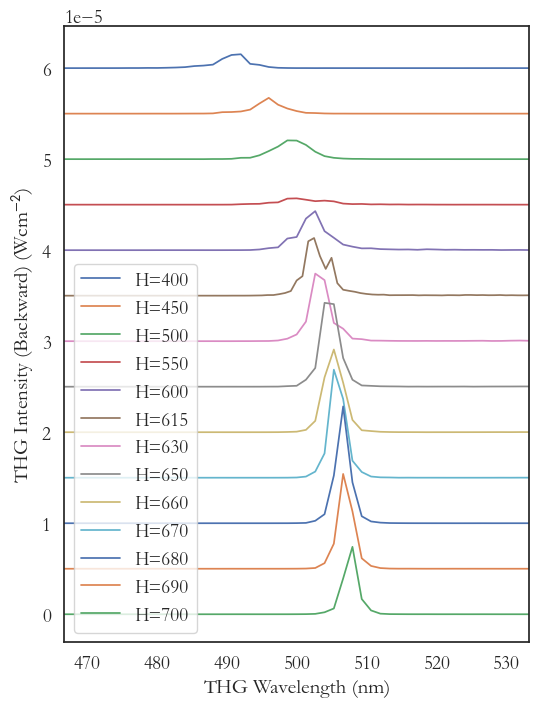

In [22]:
plt.figure(figsize=(6,8))
spacing=0.5e-5
for i in range(len(H_list)):
    sub_df = main_df[main_df['H']==H_list[i]]
    stack_sep = spacing*(len(H_list)-1-i)
    if H_list[i] in [0,50,999]:
        continue
    else:
        plt.plot(sub_df['THGWavelength_nm'],sub_df['THG_Backward']+stack_sep,label='H=%d' %((H_list[i]) ),
                 linewidth=1.25,marker='none',fillstyle='none',markersize=3, )
plt.legend(loc=3)
plt.xlim(1400/3,1600/3)
plt.xlabel('THG Wavelength (nm)')
plt.ylabel(r'THG Intensity (Backward) (Wcm$^{-2}$)')
#plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/THG_Forward.png',dpi=200)

### Fano/Lorentzian Fitting

In [23]:
from scipy.optimize import curve_fit

In [24]:
def fano(wl,wl0,gamma0,q,TA,Tnr):
    omega = 2*pi*c/wl
    omega0=2*pi*c/wl0
    domega=(omega-omega0)/gamma0
    return TA/(1+q**2) * (q+domega)**2 / (1+domega**2) + Tnr*wl**2

def fano_omega(omega,omega0,gamma0,q,TA,Tnr):
    omega = 2*pi*c/wl
    omega0=2*pi*c/wl0
    domega=(omega-omega0)/gamma0
    return TA/(1+q**2) * (q+domega)**2 / (1+domega**2)

def fano2(wl,wl0,wl02,gamma0,gamma02,q,q2,TA,TA2,Tnr):
    omega = 2*pi*c/wl
    omega0=2*pi*c/wl0
    domega=(omega-omega0)/gamma0
    
    omega2 = 2*pi*c/wl
    omega02=2*pi*c/wl02
    domega2=(omega2-omega02)/gamma02
    
    return TA/(1+q**2) * (q+domega)**2 / (1+domega**2) + TA2/(1+q2**2) * (q2+domega2)**2 / (1+domega2**2) + Tnr


def lorentzian(wl,wl0,gamma0,A,B):
    #omega = 2*pi*c/wl
    #omega0=2*pi*c/wl0
    return -A * (0.5*gamma0/((wl-wl0)**2 + (0.5*gamma0**2))) + B

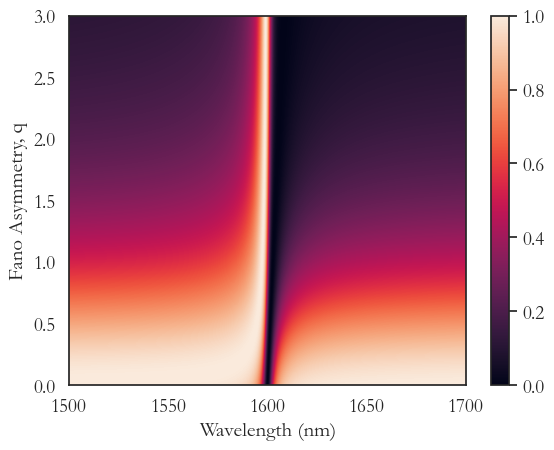

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

x1, x2 = np.meshgrid(np.linspace(1500,1700,500), np.linspace(0,3,500))
y = fano(x1,1600,2000,x2,1,0)

plt.imshow(y,extent=[1500,1700,0,3],origin='lower',aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fano Asymmetry, q')
plt.colorbar()

In [26]:
from scipy.interpolate import interp1d
from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_als(y, lam, p, niter=50):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z
  
def normalize(y_data,lam=10**7,p=0.6):
    y_baseline=baseline_als(y_data,lam,p)
    return y_data-y_baseline

def calc_fit_error(errfunc,optim,pcov,xdata,ydata,guess):
    if (len(ydata) > len(guess)) and pcov is not None:
        s_sq = (errfunc(optim, xdata, ydata)**2).sum()/(len(ydata)-len(guess))
        pcov = pcov * s_sq
    else:
        pcov = np.inf

    error = [] 
    for i in range(len(optim)):
        try:
          error.append(np.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    return np.array(error)   


def calc_Q_error(optim,fit_err):
    Q = optim[0]/optim[1]
    dQ = Q*np.sqrt( (fit_err[0]/optim[0])**2 + (fit_err[1]/optim[1])**2)
    return dQ

In [27]:
  
    

# Data to be fit

bounded = False
wl_start=1560
wl_end=1600

sub_df = main_df[main_df['H']==600]
if bounded == True:
    sub_df = sub_df[(sub_df['PumpWavelength_nm']>wl_start) & (sub_df['PumpWavelength_nm']<wl_end)]
wl_range = np.array(sub_df['PumpWavelength_nm'])
# transmission = np.array(sub_df['LinearTransmission']) 
reflection = np.array(sub_df['LinearReflection']) 

# Reference baseline data 
#sub_df_ref = main_df[main_df['H_nm']==600]
#if bounded == True:
#    sub_df_ref = sub_df_ref[(sub_df_ref['PumpWavelength_nm']>wl_start) & (sub_df_ref['PumpWavelength_nm']<wl_end)]
# wl_range_ref=np.array(sub_df_ref['PumpWavelength_nm'])
# ref_transmission = np.array(sub_df_ref['LinearTransmission'])
#ref_reflection = np.array(sub_df_ref['LinearReflection'])

# Interpolate reference data to experimental data
#f_trans = interp1d(wl_range_ref, ref_transmission,fill_value='extrapolate')
# f_refl = interp1d(wl_range_ref, ref_reflection,fill_value='extrapolate')
# ref_trans_interp = f_trans(wl_range)
# ref_refl_interp = f_refl(wl_range)


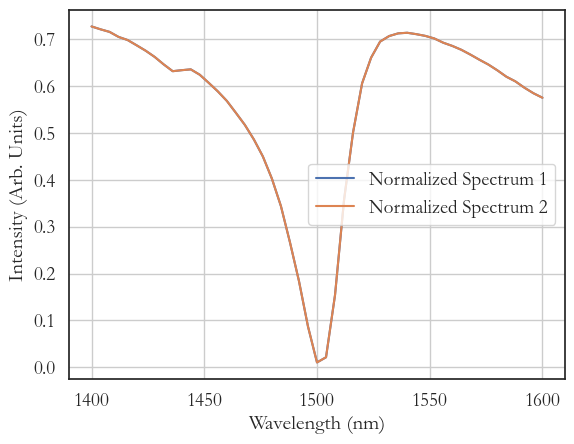

In [29]:
# Background subtract interpolated reference data
#norm_trans = transmission#-ref_trans_interp
norm_refl = reflection#-ref_refl_interp
norm_ref2 = reflection#/ref_refl_interp

#plt.plot(wl_range,reflection,'o-',label='Raw Spectrum',fillstyle='none')
#plt.plot(wl_range,ref_refl_interp,label=r'Baseline ($\alpha=0$)')
plt.plot(wl_range,norm_refl,label='Normalized Spectrum 1')
plt.plot(wl_range,norm_ref2,label='Normalized Spectrum 2')
#plt.plot(wl_range,fano2(wl_range, 1559,  1595,  2490, 1000, -1.0, 5,  0.4, 0.2,0),label='Fit')
#plt.plot(wl_range,lorentzian(wl_range,1581.5,5,4,0),label='Lorentzian')
#plt.xlim(1500,1700)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Arb. Units)')
plt.grid()
plt.legend()

[1.49859525e+03 1.67801743e+01 1.19904704e+01 6.86494736e-01]
Q-factor: 89 $\pm$ 6.13
[0.44252108 1.15147638 0.7399967  0.01042413]


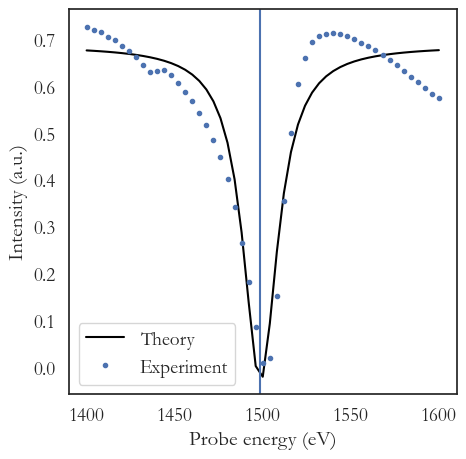

In [30]:
from scipy.optimize import leastsq,least_squares,minimize

errfunc = lambda p,x,y: np.abs(lorentzian(x,*p)-y)**2
guess1=[1560,100,0.17,0.9,0]
guess2=[1575,1610,2561,500,0.38,1.0,0.88,0.57,-1.32]
guess_lo=[1581,2000,2000,0]
optim, pcov,infodict,mesg,ier = leastsq(errfunc, guess_lo[:], args=(wl_range, norm_refl),full_output=True)
# optim, pcov = minimize(errfunc, guess2[:], args=(wl_range, norm_trans),method='SLSQP')#,constraints={[1550,1575],[1580,1610],[0,np.inf],[0,np.inf],[0,2],[0,2],[0,np.inf],[0,np.inf],[-np.inf,np.inf]})

fit_err = calc_fit_error(errfunc,optim,pcov,wl_range,norm_refl,guess_lo)
dQ = calc_Q_error(optim,fit_err)

#xx=np.linspace(1.44,2.0,1000)
plt.figure(figsize=(5,5))
plt.plot(wl_range,lorentzian(wl_range,*optim),label='Theory',color='black')
plt.plot(wl_range,norm_refl,'o',label='Experiment',markersize=3.0)#,edgecolors='black')
plt.axvline(optim[0])
plt.xlabel('Probe energy (eV)')
plt.ylabel('Intensity (a.u.)')
#plt.gca().set_yticklabels(['']*10)
plt.legend(loc='best')
print(optim)
print(r'Q-factor: %d $\pm$ %0.2f' %(optim[0]/optim[1],dQ))
print(fit_err)

In [31]:

def fano_fit(sub_df,sub_df_ref,guess2):
    wl_range = np.array(sub_df['PumpWavelength_nm'])
    transmission = np.array(sub_df['LinearTransmission ']) 
    reflection = np.array(sub_df['LinearReflection']) 

    # Reference baseline data 
    wl_range_ref=np.array(sub_df_ref['PumpWavelength_nm'])
    ref_transmission = np.array(sub_df_ref['LinearTransmission '])
    ref_reflection = np.array(sub_df_ref['LinearReflection'])

    # Interpolate reference data to experimental data
    #f = interp1d(wl_range_ref, ref_transmission,fill_value='extrapolate')
    #ref_trans_interp = f(wl_range)
    
    #f2 = interp1d(wl_range_ref, ref_transmission,fill_value='extrapolate')
    #ref_trans_interp = f(wl_range)

    # Background subtract interpolated reference data
    # norm_trans = transmission-ref_trans_interp
    
    errfunc = lambda p,x,y: (fano(x,*p)-y)**2
    # guess1=[1550,2899,0.17,0.9,0]
    # guess2=[1557,1592,2561,1398,0.38,0.49,0.88,0.57,-1.32]
    optim, success,infodict,mesg,ier = leastsq(errfunc, guess2[:], args=(wl_range, norm_trans),full_output=True)
    
    plt.plot(c/wl_range,fano(wl_range,*optim),label='Theory',color='black')
    plt.plot(c/wl_range,norm_trans,'o',label='Experiment',markersize=3.0)#,edgecolors='black')
    # plt.plot(wl_range,fano2(wl_range,1558,2899,0.17,0.9,0.9, 1.59898359e+03,  6.90351242e+04,  2.53265622e+00,0.9, 0.9))
    #plt.xlim(1.47,1.86)
    #plt.ylim(-0.5,0.5)
    #plt.title('Peak1=%d, Gamma1=%d, Q1=%d, q1=%0.1f, TA1=%0.1f \n Peak2=%d, Gamma2=%d, Q2=%d, q2=%0.1f, TA2=%0.1f' 
    #          %(optim[0],optim[2],(optim[0])/optim[2],optim[4],optim[6],optim[1],optim[3],(optim[1])/optim[3],optim[5],optim[7]))
    plt.xlabel('Probe energy (eV)')
    plt.ylabel('Intensity (a.u.)')
    #plt.gca().set_yticklabels(['']*10)
    plt.legend(loc='best')
    plt.show()
    

def lorentzian_fit(sub_df,sub_df_ref,guess,wl_start,wl_end):
    
    sub_df = sub_df[(sub_df['PumpWavelength_nm']>wl_start) & (sub_df['PumpWavelength_nm']<wl_end)]
    sub_df_ref = sub_df_ref[(sub_df_ref['PumpWavelength_nm']>wl_start) & (sub_df_ref['PumpWavelength_nm']<wl_end)]

    wl_range = np.array(sub_df['PumpWavelength_nm'])
    transmission = np.array(sub_df['LinearTransmission']) 
    reflection = np.array(sub_df['LinearReflection']) 

    # Reference baseline data 
    wl_range_ref=np.array(sub_df_ref['PumpWavelength_nm'])
    #ref_transmission = np.array(sub_df_ref['LinearTransmission'])
    ref_reflection = np.array(sub_df_ref['LinearReflection'])

    # Interpolate reference data to experimental data
    #f_trans = interp1d(wl_range_ref, ref_transmission,fill_value='extrapolate')
    #ref_trans_interp = f_trans(wl_range)
    
    #f_refl = interp1d(wl_range_ref, ref_reflection,fill_value='extrapolate')
    #ref_refl_interp = f_refl(wl_range)

    # Background subtract interpolated reference data
    #norm_trans = transmission-ref_trans_interp
    norm_refl = reflection #/ref_refl_interp

    # Background subtract interpolated reference data
    #norm_trans = transmission-ref_trans_interp
    norm_refl = reflection#-ref_refl_interp
    
    errfunc = lambda p,x,y: (lorentzian(x,*p)-y)**2
    # guess1=[1550,2899,0.17,0.9,0]
    # guess2=[1557,1592,2561,1398,0.38,0.49,0.88,0.57,-1.32]
    optim, pcov,infodict,mesg,ier = leastsq(errfunc, guess[:], args=(wl_range, norm_refl),full_output=True)
    fit_err = calc_fit_error(errfunc,optim,pcov,wl_range,norm_refl,guess)
    dQ = calc_Q_error(optim,fit_err)
    
    print(optim)
    print(fit_err)

    plt.figure(figsize=(4,4))
    plt.title(r'$\lambda_0$=%0d, $\delta \lambda$ = %0.1f, Q=%d (%d)' %(optim[0], optim[1],optim[0]/optim[1],dQ))
    plt.plot(wl_range,lorentzian(wl_range,*optim),label='Lorentzian Fit',color='black')
    plt.plot(wl_range,norm_refl,'o',label='Experiment',markersize=3.0,fillstyle='none')#,edgecolors='black')
    plt.axvline(optim[0],linestyle='--',alpha=0.5)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (a.u.)')
    #plt.gca().set_yticklabels(['']*10)
    plt.legend(loc='best')
    plt.show()


### Individual Fits

#### H = 700nm

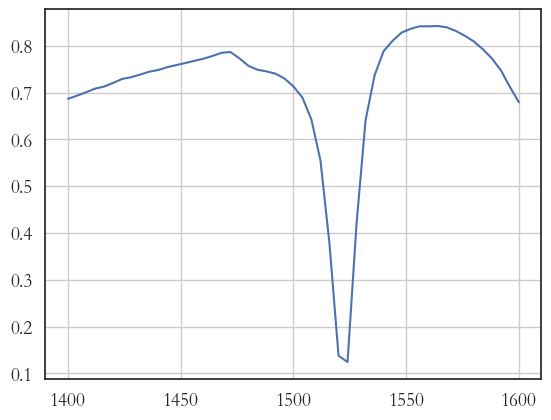

In [113]:
sub_df = main_df[main_df['H']==700]
# sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.52147493e+03 9.27174752e+00 7.03258378e+00 8.23196015e-01]
[0.28485807 0.86344395 0.66763973 0.01511197]


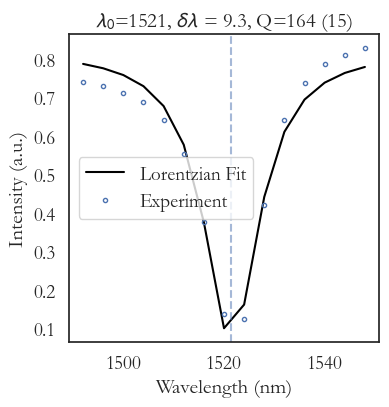

In [115]:
guess1=[1530,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1490,1550)

#### H = 690nm

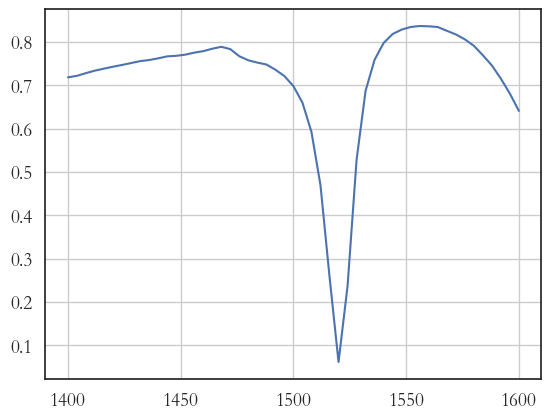

In [35]:
sub_df = main_df[main_df['H']==690]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.51961782e+03 9.81448360e+00 7.59962277e+00 8.30388059e-01]
[0.23999565 1.24403294 0.69172965 0.01797641]


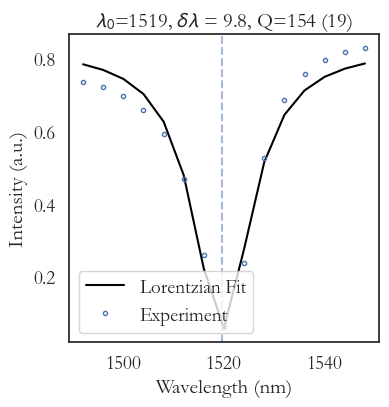

In [36]:
guess1=[1530,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1490,1550)

#### H = 680nm

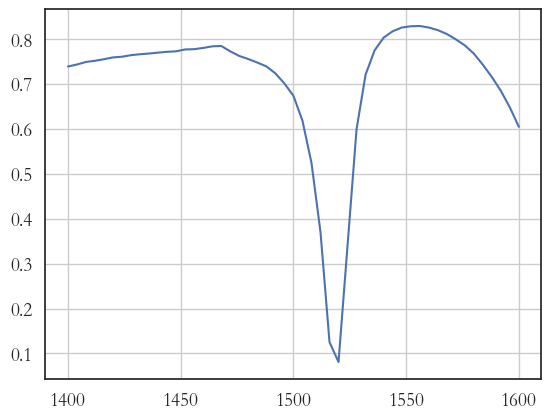

In [37]:
sub_df = main_df[main_df['H']==680]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.51769880e+03 1.04528706e+01 8.23900686e+00 8.36155501e-01]
[0.24684413 0.77477172 0.62680775 0.01622409]


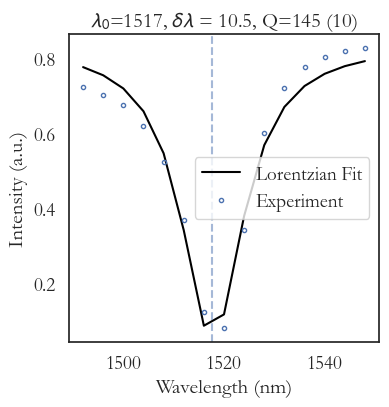

In [39]:
guess1=[1520,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1490,1550)

#### H = 670nm

[1.51576921e+03 1.09934302e+01 8.64515923e+00 8.33339508e-01]
[0.25167297 1.35321725 0.90467693 0.02339647]


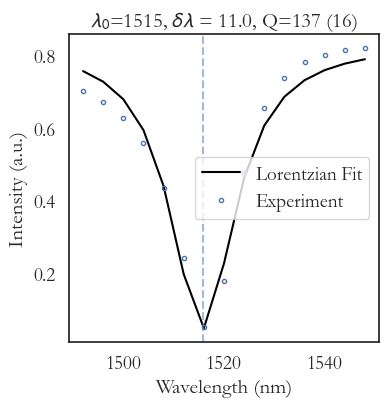

In [40]:
sub_df = main_df[main_df['H']==670]
sub_df_ref = main_df[main_df['S1_nm']==230]
#plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
#plt.grid()

guess1=[1520,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1490,1550)

#### H=660nm

[1.51354082e+03 1.19391495e+01 9.36051482e+00 8.34921366e-01]
[0.28519013 1.05040511 0.96089365 0.02383927]


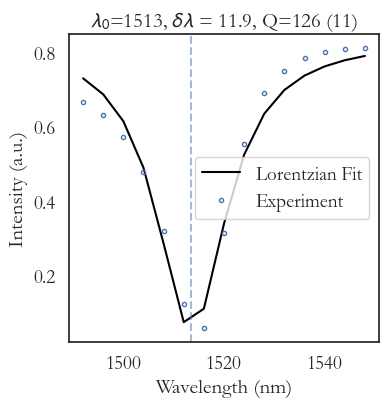

In [41]:
sub_df = main_df[main_df['H']==660]
sub_df_ref = main_df[main_df['S1_nm']==230]
#plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
#plt.grid()

guess1=[1520,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1490,1550)

#### H = 650nm

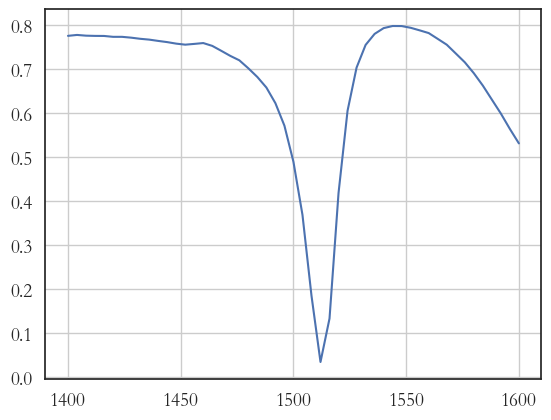

In [116]:
sub_df = main_df[main_df['H']==650]
# sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.51145731e+03 1.24471605e+01 9.84953746e+00 8.17367404e-01]
[0.2991798  1.42621879 1.06287016 0.02437579]


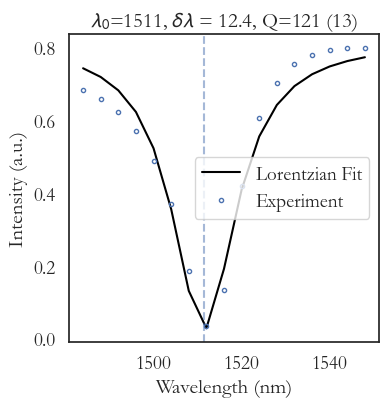

In [118]:
guess1=[1520,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1480,1550)

#guess2=[1620,2,1.411,0.02]
#lorentzian_fit(sub_df,sub_df_ref,guess2,1610,1630)

#### H = 630nm

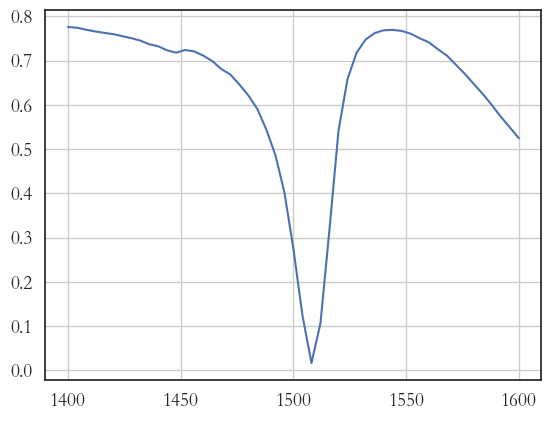

In [119]:
sub_df = main_df[main_df['H']==630]
# sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.50652403e+03 1.66767025e+01 1.34924161e+01 8.42037697e-01]
[0.38713848 2.25161668 2.30335098 0.05152504]


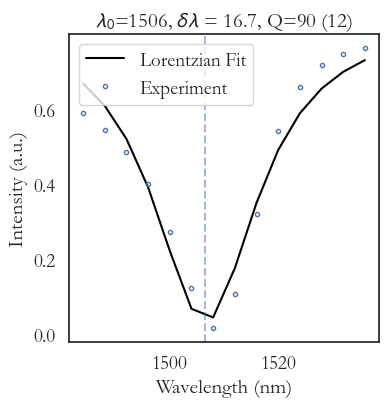

In [120]:
guess1=[1510,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1480,1540)
#guess2=[1610,2,1.411,0.02]
#lorentzian_fit(sub_df,sub_df_ref,guess2,1605,1620)

#### H = 615nm

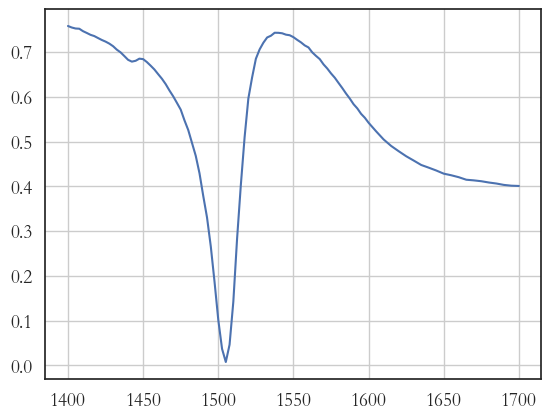

In [148]:
sub_df = main_df[main_df['H']==615]
# sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.50249331e+03 1.64879243e+01 1.24423005e+01 7.56989175e-01]
[0.32224789 1.21242839 0.92979718 0.01615784]


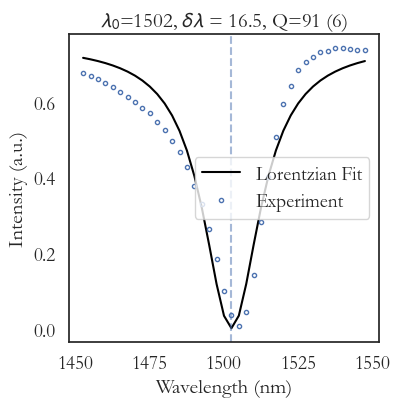

In [149]:
guess1=[1500,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1450,1550)


#### H = 600nm

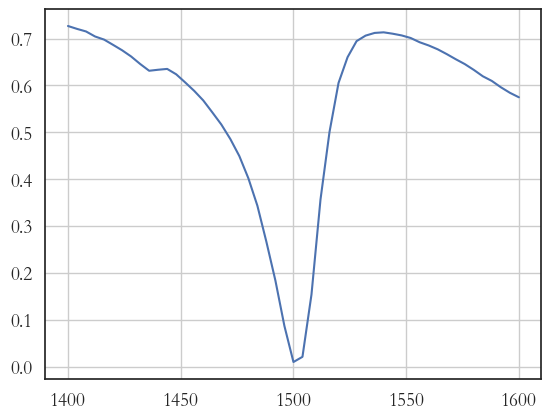

In [150]:
sub_df = main_df[main_df['H']==600]
# sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.49803413e+03 2.04990027e+01 1.51501305e+01 7.39630937e-01]
[0.57777465 2.41625055 1.96995324 0.02990744]


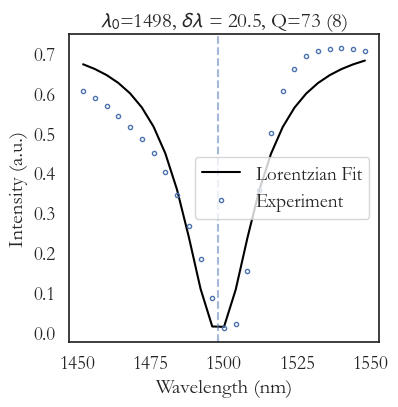

In [154]:
guess1=[1500,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1450,1550)

#### H = 550nm

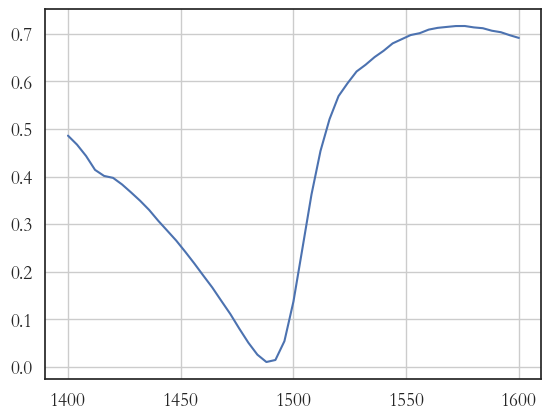

In [155]:
sub_df = main_df[main_df['H']==550]
# sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.47369432e+03 8.76353842e+01 1.02377088e+02 1.21160131e+00]
[ 0.94225759 13.07564904 30.87666015  0.19061726]


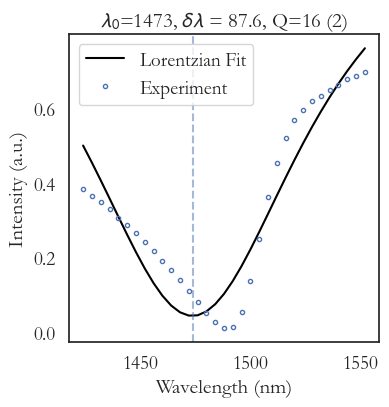

In [127]:
guess1=[1490,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1420,1555)

#### H = 500nm

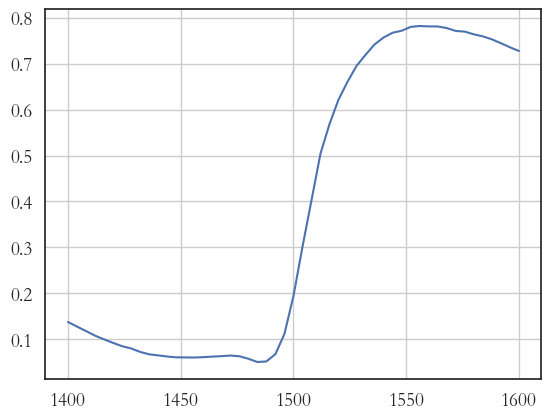

In [128]:
sub_df = main_df[main_df['H']==500]
# sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

#### H = 450nm

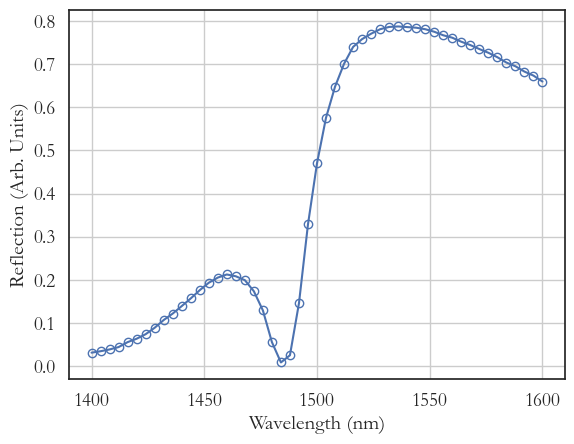

In [135]:
sub_df = main_df[main_df['H']==450]
# sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'],'o-',fillstyle='none')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflection (Arb. Units)')
#plt.xlim(1500,1700)
plt.grid()

[1.48253861e+03 8.35908346e+00 3.29083378e+00 3.30127521e-01]
[1.66318016 4.79479551 1.58110971 0.04228158]


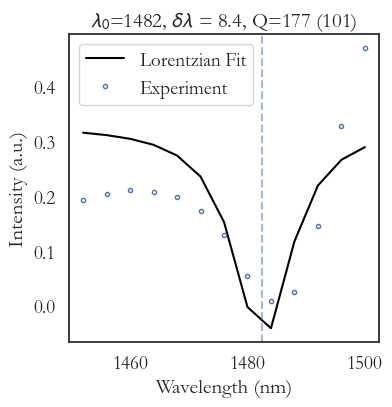

In [145]:
guess1=[1480,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1450,1500)


#### H = 400nm

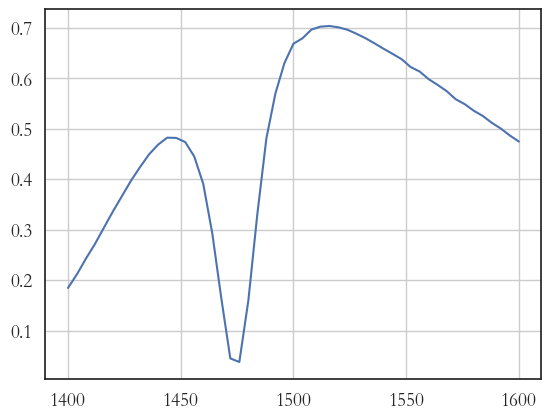

In [132]:
sub_df = main_df[main_df['H']==400]
# sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.47265699e+03 1.98232421e+01 1.45081987e+01 7.76017774e-01]
[0.39801317 2.96654565 2.95616332 0.06083997]


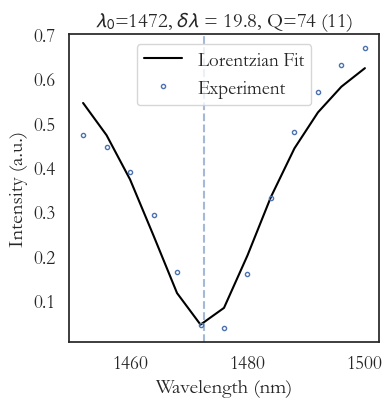

In [133]:
guess1=[1480,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1450,1500)


### Enhancement

[0.037682 0.037962]


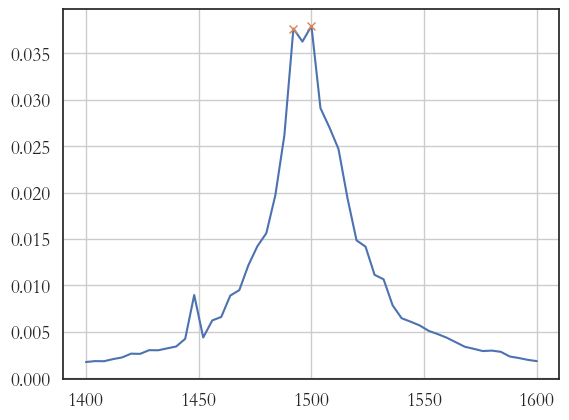

In [42]:
from scipy.signal import find_peaks


sub_df = main_df[main_df['H']==500]
relE = np.array(sub_df['RFE_THG'])
peaks,_ = find_peaks(relE,height=0.5*max(relE))
plt.plot(sub_df['PumpWavelength_nm'],relE)
plt.plot(sub_df['PumpWavelength_nm'].iloc[peaks],relE[peaks],'x')
plt.grid()
print(relE[peaks])

660 [9.08814365e-06]


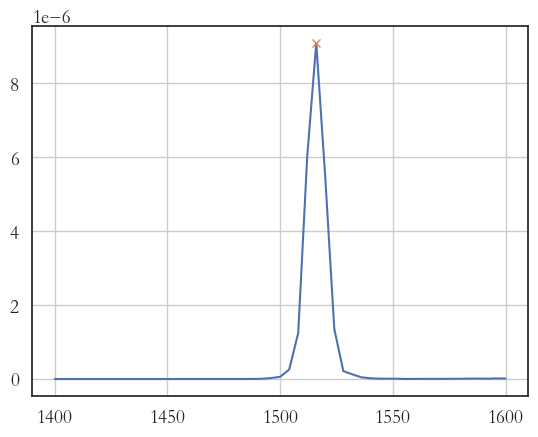

670 [1.18691503e-05]


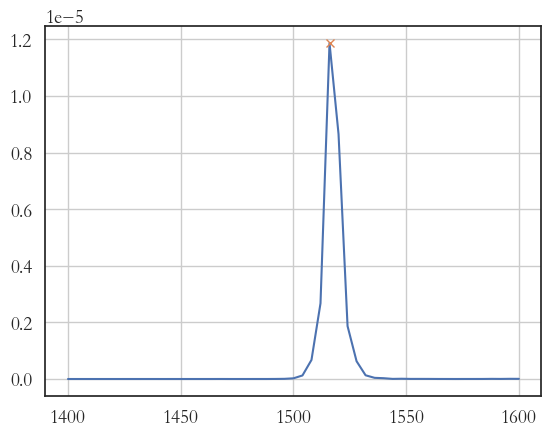

680 [1.28347442e-05]


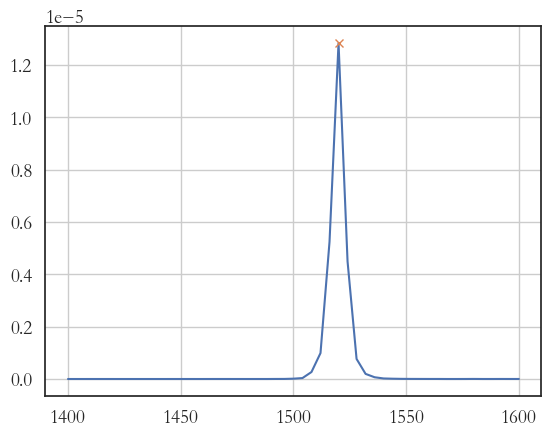

690 [1.04150371e-05]


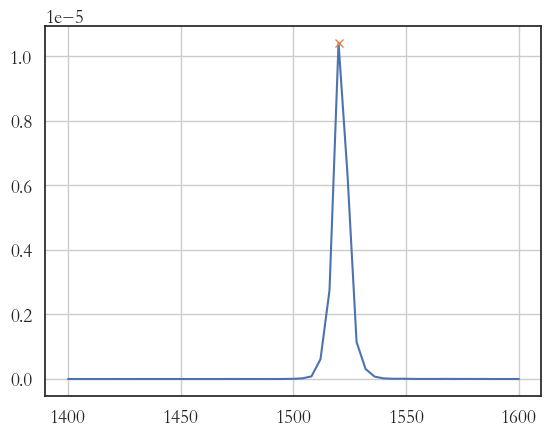

In [47]:
#for i in H_list:
for i in [660,670,680,690]:
    sub_df = main_df[main_df['H']==i]
    relE = np.array(sub_df['THG_Backward'])
    peaks,_ = find_peaks(relE,height=0.5*max(relE))
    plt.plot(sub_df['PumpWavelength_nm'],relE)
    plt.plot(sub_df['PumpWavelength_nm'].iloc[peaks],relE[peaks],'x')
    plt.grid()
    print(i,relE[peaks])
    plt.show()

### Q-factor Analysis

In [48]:
results = pd.read_excel('../COMSOL Simulation - THG SiMS/240312-HeightSweep_Qnr=150/240314-HeightSweep_Qnr=150_Results.xlsx',index_col=None)

In [49]:
results

,S1_nm,Qnr,H_nm,Peak2,Linewidth2,Q-factor2,Qf2-err,THGF1,THGF2,THGB1,THGB2,FE1_Pump,FE2_pump,FE1_THG,FE2_THG,E0
0,120,150,700,1521,9.3,164,15,NaN,0.000013,NaN,7.407353e-06,NaN,6.8021,NaN,0.078829,NaN
1,120,150,690,1519,9.8,154,19,NaN,0.000015,NaN,1.041504e-05,NaN,6.8474,NaN,0.093042,NaN
2,120,150,680,1517,10.5,145,10,NaN,0.000023,NaN,1.283474e-05,NaN,6.6471,NaN,0.080635,NaN
3,120,150,670,1515,11.0,137,16,NaN,0.000023,NaN,1.186915e-05,NaN,6.6597,NaN,0.078259,NaN
4,120,150,660,1513,11.9,126,11,NaN,0.000022,NaN,9.088144e-06,NaN,6.4571,NaN,0.082647,NaN
5,120,150,650,1511,12.4,121,13,NaN,0.000021,NaN,9.213473e-06,NaN,6.5268,NaN,0.065769,NaN
6,120,150,630,1506,16.7,90,12,NaN,0.000014,NaN,7.427382e-06,NaN,6.2427,NaN,0.058873,NaN
7,120,150,615,1502,16.5,91,6,NaN,0.000014,NaN,6.334340e-06,NaN,6.0775,NaN,0.053329,NaN
8,120,150,600,1498,20.5,73,8,NaN,0.000010,NaN,4.289498e-06,NaN,5.7557,NaN,0.043999,NaN
9,120,150,550,1490,0.0,0,0,NaN,0.000007,NaN,6.917111e-07,NaN,5.4914,NaN,0.029806,NaN


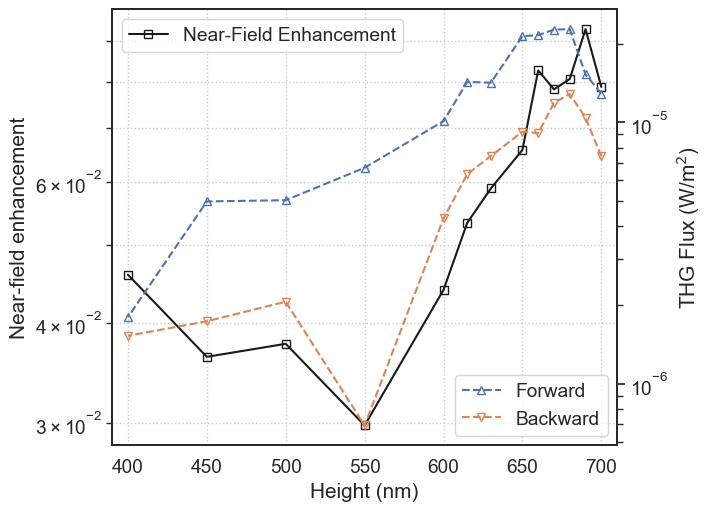

In [51]:
matplotlib.rcParams['mathtext.fontset'] = 'dejavusans'
from matplotlib.ticker import AutoMinorLocator
sns.set(font_scale=1.25,style='white', palette='deep',font='Arial',rc = {'figure.figsize':(7,5)})

fig, ax = plt.subplots(layout='constrained')
plt.semilogy(results['H_nm'],results['FE2_THG'],'s-',label='Near-Field Enhancement',fillstyle='none',color='k')

plt.xlabel(r'Height (nm)')
plt.ylabel('Near-field enhancement')
plt.legend()
plt.grid(True, which="both", ls=':')
plt.xlim(min(results['H_nm'])-10,max(results['H_nm'])+10)
#plt.savefig('TSFG_Efficiency',dpi=200,bbox_inches='tight')
#plt.axhline(3.6e-33)
#plt.axhline(3.5e-31)

ax2 = ax.twinx()
#ax2.plot(asy_range,THG_enhancement(asy_range,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),color='C1',linewidth=1.5)
plt.semilogy(results['H_nm'],results['THGF2'],'^--',label='Forward',fillstyle='none')
plt.semilogy(results['H_nm'],results['THGB2'],'v--',label='Backward',fillstyle='none')
# ax2.arrow(0.55,THG_enhancement(0.55,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),0.085,0.0,color='C1',width=0.002,head_width=0.025,head_length=0.01)
#ax2.plot(np.sqrt(Q0/Qnr),THG_enhancement(np.sqrt(Q0/Qnr),Q0,Qnr),marker='o',markersize=8,color='k',fillstyle='none')
#ax2.set_ylim([0.5e7,0.3e9])
ax2.set_ylabel(r'THG Flux (W/m$^2$)')
ax2.legend(loc=4)

In [52]:
def Qtot(alpha,Q0,Qnr):
    alpha_opt=np.sqrt(Q0/Qnr)
    return Qnr/((alpha**2 / alpha_opt**2) + 1) 

def Qtot2(alpha,Qnr):
    # alpha_opt=np.sqrt(Q0/Qnr)
    alpha_opt = 0.45
    return Qnr/((alpha**2 / alpha_opt**2) + 1) 

def THG_enhancement(alpha,Q0,Qnr):
    alpha_opt=np.sqrt(Q0/Qnr)
    alpha_p = alpha**2 / alpha_opt**2
    return Qnr**3 * (alpha_p/(alpha_p+1)**2)**3

In [53]:
asy_range = np.linspace(0.05,0.45)

I0=1e13 
E0=np.sqrt(2*I0/(c*epsilon_0))

THG_nonlinearity = results['FE2_THG']/E0**2
THG_nonlinearity2 = THG_nonlinearity/max(THG_nonlinearity)
THG_conv_eff = results['FE2_THG']**2/max(results['FE2_THG']**2)

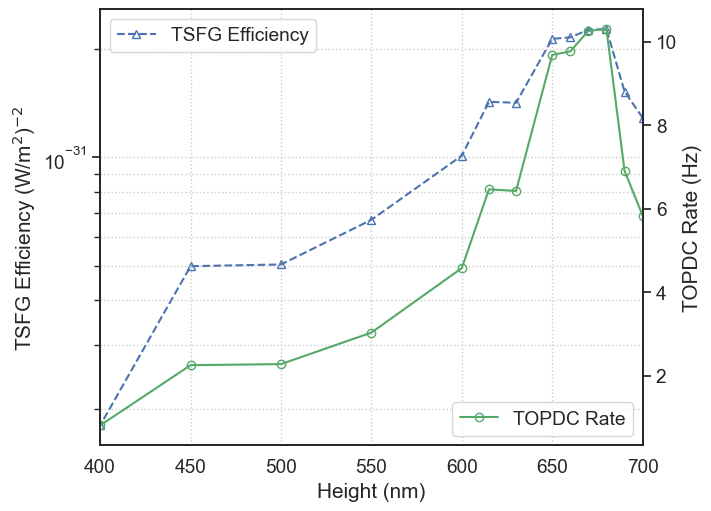

In [57]:
I_THG = 0.5*c*epsilon_0*(results['FE2_THG']*E0)**2
#TSFG_efficiency1 = I_THG/I0**2
TSFG_efficiency_F = results['THGF2'] /I0**2
TSFG_efficiency_B = results['THGB2'] /I0**2


matplotlib.rcParams['mathtext.fontset'] = 'dejavusans'
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
sns.set(font_scale=1.25,style='white', palette='deep',font='Arial',rc = {'figure.figsize':(7,5)})

fig, ax = plt.subplots(layout='constrained')
plt.semilogy(results['H_nm'],TSFG_efficiency_F,'^--',label='TSFG Efficiency',fillstyle='none')
# plt.semilogy(results['Asymmetry'],TSFG_efficiency_B,'v--',label='Backward',fillstyle='none')
plt.xlabel(r'Height (nm)')
plt.ylabel(r'TSFG Efficiency (W/m$^2$)$^{-2}$')
plt.legend()
plt.grid(True, which="both", ls=':')
plt.xlim(min(results['H_nm'])-0.01,max(results['H_nm'])+0.01)
#plt.savefig('TSFG_Efficiency',dpi=200,bbox_inches='tight')
#plt.axhline(3.6e-33)
#plt.axhline(3.5e-31)

def asytoS1(asy):
    return 230-(asy*230)

def S1toasy(S1):
    return (230-S1)/230

#secax = ax.secondary_xaxis('top', functions=(asytoS1, S1toasy))
#secax.xaxis.set_minor_locator(AutoMinorLocator())
#secax.set_xlabel(r'S1 (nm)')


ax2 = ax.twinx()
#ax2.plot(asy_range,THG_enhancement(asy_range,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),color='C1',linewidth=1.5)
ax2.plot(results['H_nm'],TOPDC,marker='o',linestyle='-',fillstyle='none',color='C2',label='TOPDC Rate')
# ax2.arrow(0.55,THG_enhancement(0.55,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),0.085,0.0,color='C1',width=0.002,head_width=0.025,head_length=0.01)
#ax2.plot(np.sqrt(Q0/Qnr),THG_enhancement(np.sqrt(Q0/Qnr),Q0,Qnr),marker='o',markersize=8,color='k',fillstyle='none')
#ax2.set_ylim([0.5e7,0.3e9])
ax2.set_ylabel('TOPDC Rate (Hz)')
ax2.legend(loc=4)

In [55]:
# General calculation

# Wavelength parameters
lp = 500.3e-9 # 520nm
l1 = 3*lp # 1560nm
lw = 4e-9 # 50nm
spectral_lw = 4/3 * (2*pi*c*lw/(l1**2))**2 # s^-2

# Geometric parameters
meta_area = (120e-9+230e-9)*570e-9 # m^2
unit_cell = 680e-9**2 #m^2
beam_spot = pi*(5e-6)**2 # m^2

# THG Simulation Results

spdc_pump_flux = 12e13  # 1e13 W/m^2 = 1 GW/cm^2
TSFG_efficiency_f = 3e-31*meta_area # m^2 / (W/m^2)^2 (the same for all pump power)

TOPDC = hbar*c/(2*pi) * lp**4/(l1**9) * spectral_lw * 4*pi**2 * TSFG_efficiency_F * spdc_pump_flux * beam_spot

In [56]:
TOPDC

0      5.835283
1      6.903726
2     10.295742
3     10.256665
4      9.763019
5      9.680098
6      6.424320
7      6.462178
8      4.578184
9      3.034609
10     2.279853
11     2.255065
12     0.812930
Name: THGF2, dtype: float64

[-501.1613232  1616.46367962]


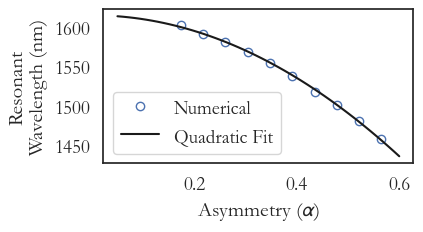

In [109]:
from scipy.optimize import curve_fit
asy_range = np.linspace(0.05,0.6)
def quad(x,a,b):
    return a*x**2 + b

popt, pcov = curve_fit(quad, results['Asymmetry'], results['Peak2'])
plt.figure(figsize=(4,2))
plt.plot(results['Asymmetry'],results['Peak2'],'o',fillstyle='none',label='Numerical')
plt.plot(asy_range,quad(asy_range,*popt),'k-',label='Quadratic Fit')
plt.legend(loc=3)
plt.xlabel(r'Asymmetry ($\alpha$)')
plt.ylabel('Resonant\nWavelength (nm)')
#plt.xlim(0.1,0.41)
print(popt)

In [140]:
from scipy.optimize import leastsq
errfunc2 = lambda p,x,y: np.abs(Qtot2(x,*p)-y)**2
errfunc3 = lambda p,x,y: np.abs(THG_enhancement(x,*p)-y)**2
guess=[8,2000]
guess1=[400]
optim1, success,infodict,mesg,ier = leastsq(errfunc2, guess1[:], args=(results['Asymmetry'], results['Q-factor2']/2),full_output=True)
optim2, success,infodict,mesg,ier = leastsq(errfunc3, guess[:], args=(results['Asymmetry'], results['FE2_THG']),full_output=True)

In [141]:
# calculate optimal asymmetry from FE2_THG fitting
aa=np.sqrt(optim2[0]/optim2[1])
print(aa)

0.4498435810860461


In [142]:
optim1, optim2

(array([145.53616543]), array([0.31951756, 1.57896201]))

In [143]:
optim1

array([145.53616543])

In [144]:
145*aa**2

29.342090879426127

In [181]:
np.sqrt(29/200)

0.3807886552931954

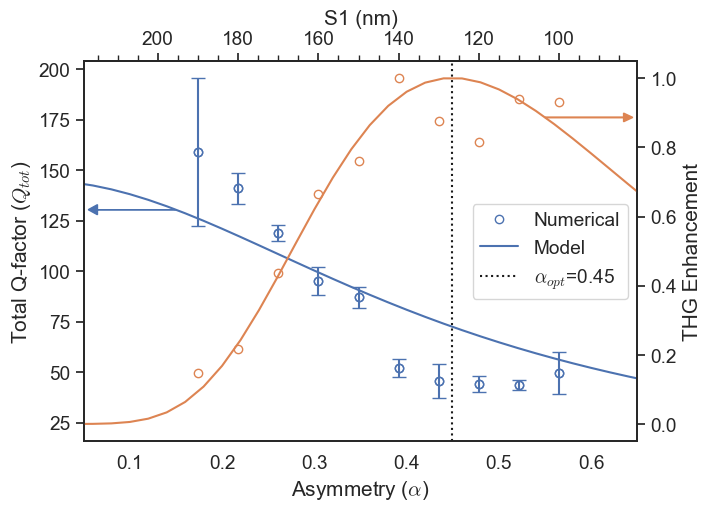

[1.55296107e+03 9.23362593e+01 5.32489286e+01 1.39027562e-01]


In [146]:
Q0=29.3
Qnr=145
asy_range = np.linspace(0.02,1)

from matplotlib.ticker import AutoMinorLocator
matplotlib.rcParams['mathtext.fontset'] = 'cm'

fig, ax = plt.subplots(layout='constrained')
#plt.figure(figsize=(7,5))
sns.set(font_scale=1.25,style='white', palette='deep',font='Arial',rc = {'figure.figsize':(7,5)})
#plt.axhspan(optim[0]/2-100,optim[0]/2+100 ,color='C2',alpha=0.2)
#plt.axhline(optim[0]/2,color='C2',linestyle=':',alpha=0.8,label=r'$Q_{rad}=Q_{par}$')
plt.axvline(np.sqrt(Q0/Qnr),linestyle=':',color='k',label=r'$\alpha_{opt}$=%0.2f' %(np.sqrt(Q0/Qnr)))
plt.plot(asy_range,Qtot(asy_range,Q0,Qnr),label=r'Model',color='C0',linewidth=1.5)
plt.plot(results['Asymmetry'],results['Q-factor2']/2,'o',label='Numerical',color='C0',fillstyle='none')
plt.errorbar(results['Asymmetry'],results['Q-factor2']/2,results['Qf2-err']/2,fmt='o',capsize=5,color='C0',fillstyle='none')
plt.arrow(0.15,Qtot(0.15,Q0,Qnr),-0.095,0,color='C0',length_includes_head=True,width=0.002,head_width=5,head_length=0.01)
plt.legend(reverse=True,loc=5)
plt.xlabel(r'Asymmetry ($\alpha$)')
plt.ylabel(r'Total Q-factor ($Q_{tot}$)')
plt.xlim(0.05,0.65)


def asytoS1(asy):
    return 230-(asy*230)

def S1toasy(S1):
    return (230-S1)/230

secax = ax.secondary_xaxis('top', functions=(asytoS1, S1toasy))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel(r'S1 (nm)')

ax2 = ax.twinx()
ax2.plot(asy_range,THG_enhancement(asy_range,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),color='C1',linewidth=1.5)
ax2.plot(results['Asymmetry'],results['FE2_THG']/max(results['FE2_THG']),marker='o',linestyle='none',fillstyle='none',color='C1')
ax2.arrow(0.55,THG_enhancement(0.55,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),0.085,0.0,color='C1',width=0.002,head_width=0.025,head_length=0.01)
#ax2.plot(np.sqrt(Q0/Qnr),THG_enhancement(np.sqrt(Q0/Qnr),Q0,Qnr),marker='o',markersize=8,color='k',fillstyle='none')
#ax2.set_ylim([0.5e7,0.3e9])
ax2.set_ylabel('THG Enhancement')
plt.show()

#plt.savefig('Q-Factor_Results_Qnr=150.png',dpi=200,bbox_inches='tight')
print(optim)

In [147]:
Q0, Qnr

(29.3, 145)